# Lab 11 (by Luke Puglisi and Kidus Asfaw)

This is the last lab of the semester and will wrap up the content around modeling in R.

## Table of Contents
* [Review/Explore](#Review/Explore)
* [Exercises](#Exercises)

In [48]:
#install.packages('gapminder')

In [49]:
library(tidyverse)
library(stringr)
library(modelr)
library(broom)
library(gapminder)
options(repr.plot.width=6, repr.plot.height=3)

## Review/Explore

For this lab, we quickly review some of the new concepts of nesting models then spend the rest of lab reviewing anything you want (as the final is coming up)! 

In [50]:
#From the lecture notes, make a simple function that trains a linear model to predict life expectancy from the year
country_model <- function(df) {
  lm(lifeExp ~ year, data = df)
}
#Nest a whole dataset by country and continent within a tibble
by_country = gapminder %>% group_by(country, continent) %>% nest

In [51]:
#Original data
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [52]:
#Notice how all data is stored in each row
head(by_country)

country,continent,data
Afghanistan,Asia,"1.952000e+03, 1.957000e+03, 1.962000e+03, 1.967000e+03, 1.972000e+03, 1.977000e+03, 1.982000e+03, 1.987000e+03, 1.992000e+03, 1.997000e+03, 2.002000e+03, 2.007000e+03, 2.880100e+01, 3.033200e+01, 3.199700e+01, 3.402000e+01, 3.608800e+01, 3.843800e+01, 3.985400e+01, 4.082200e+01, 4.167400e+01, 4.176300e+01, 4.212900e+01, 4.382800e+01, 8.425333e+06, 9.240934e+06, 1.026708e+07, 1.153797e+07, 1.307946e+07, 1.488037e+07, 1.288182e+07, 1.386796e+07, 1.631792e+07, 2.222742e+07, 2.526840e+07, 3.188992e+07, 7.794453e+02, 8.208530e+02, 8.531007e+02, 8.361971e+02, 7.399811e+02, 7.861134e+02, 9.780114e+02, 8.523959e+02, 6.493414e+02, 6.353414e+02, 7.267341e+02, 9.745803e+02"
Albania,Europe,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 55.230, 59.280, 64.820, 66.220, 67.690, 68.930, 70.420, 72.000, 71.581, 72.950, 75.651, 76.423, 1282697.000, 1476505.000, 1728137.000, 1984060.000, 2263554.000, 2509048.000, 2780097.000, 3075321.000, 3326498.000, 3428038.000, 3508512.000, 3600523.000, 1601.056, 1942.284, 2312.889, 2760.197, 3313.422, 3533.004, 3630.881, 3738.933, 2497.438, 3193.055, 4604.212, 5937.030"
Algeria,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 43.077, 45.685, 48.303, 51.407, 54.518, 58.014, 61.368, 65.799, 67.744, 69.152, 70.994, 72.301, 9279525.000, 10270856.000, 11000948.000, 12760499.000, 14760787.000, 17152804.000, 20033753.000, 23254956.000, 26298373.000, 29072015.000, 31287142.000, 33333216.000, 2449.008, 3013.976, 2550.817, 3246.992, 4182.664, 4910.417, 5745.160, 5681.359, 5023.217, 4797.295, 5288.040, 6223.367"
Angola,Africa,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 30.015, 31.999, 34.000, 35.985, 37.928, 39.483, 39.942, 39.906, 40.647, 40.963, 41.003, 42.731, 4232095.000, 4561361.000, 4826015.000, 5247469.000, 5894858.000, 6162675.000, 7016384.000, 7874230.000, 8735988.000, 9875024.000, 10866106.000, 12420476.000, 3520.610, 3827.940, 4269.277, 5522.776, 5473.288, 3008.647, 2756.954, 2430.208, 2627.846, 2277.141, 2773.287, 4797.231"
Argentina,Americas,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 62.485, 64.399, 65.142, 65.634, 67.065, 68.481, 69.942, 70.774, 71.868, 73.275, 74.340, 75.320, 17876956.000, 19610538.000, 21283783.000, 22934225.000, 24779799.000, 26983828.000, 29341374.000, 31620918.000, 33958947.000, 36203463.000, 38331121.000, 40301927.000, 5911.315, 6856.856, 7133.166, 8052.953, 9443.039, 10079.027, 8997.897, 9139.671, 9308.419, 10967.282, 8797.641, 12779.380"
Australia,Oceania,"1952.000, 1957.000, 1962.000, 1967.000, 1972.000, 1977.000, 1982.000, 1987.000, 1992.000, 1997.000, 2002.000, 2007.000, 69.120, 70.330, 70.930, 71.100, 71.930, 73.490, 74.740, 76.320, 77.560, 78.830, 80.370, 81.235, 8691212.000, 9712569.000, 10794968.000, 11872264.000, 13177000.000, 14074100.000, 15184200.000, 16257249.000, 17481977.000, 18565243.000, 19546792.000, 20434176.000, 10039.596, 10949.650, 12217.227, 14526.125, 16788.629, 18334.198, 19477.009, 21888.889, 23424.767, 26997.937, 30687.755, 34435.367"


In [53]:
head(by_country$data)

year,lifeExp,pop,gdpPercap
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134
1982,39.854,12881816,978.0114
1987,40.822,13867957,852.3959
1992,41.674,16317921,649.3414
1997,41.763,22227415,635.3414


In [54]:
#Train a the linear model on each countries/countinent of data
models = by_country$data %>% map(country_model)

In [55]:
#Stores multiple models in a variable
head(models)

[[1]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -507.5343       0.2753  


[[2]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -594.0725       0.3347  


[[3]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
 -1067.8590       0.5693  


[[4]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -376.5048       0.2093  


[[5]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -389.6063       0.2317  


[[6]]

Call:
lm(formula = lifeExp ~ year, data = df)

Coefficients:
(Intercept)         year  
  -376.1163       0.2277  



In [56]:
# The glance function gives you a nice snapshot of how each model performed (similar to summary(), but more comprehensive)
map(models,glance)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9477123,0.9424835,1.222788,181.2494,9.835213e-08,2,-18.34693,42.69387,44.14859,14.9521,10
r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9105778,0.9016355,1.983062,101.829,1.462763e-06,2,-24.14904,54.29807,55.75279,39.32533,10
r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9851172,0.9836289,1.323006,661.9171,1.808143e-10,2,-19.29221,44.58443,46.03915,17.50346,10
r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.8878146,0.8765961,1.407009,79.13818,4.593498e-06,2,-20.03093,46.06186,47.51658,19.79675,10
r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9955681,0.9951249,0.2923072,2246.366,4.215567e-13,2,-1.173933,8.347866,9.802586,0.8544349,10
r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual


### Prediction

In [57]:
head(sim1)

x,y,resid
1,4.199913,-2.0724420
1,7.510634,1.2382791
1,2.125473,-4.1468822
2,8.988857,0.6649694
2,10.243105,1.9192174
2,11.296823,2.9729351


To visualise the predictions from a model, we start by generating an evenly spaced grid of values that covers the region where our data lies. The easiest way to do that is to use modelr::data_grid(). Its first argument is a data frame, and for each subsequent argument it finds the unique variables and then generates all combinations

In [58]:
grid <- sim1 %>% 
  data_grid(x) 
grid

x
1
2
3
4
5
6
7
8
9
10


In [59]:
sim1_mod <- lm(y ~ x, data = sim1)
coef(sim1_mod)

grid <- grid %>% 
  add_predictions(sim1_mod) 
grid

(Intercept)           x 
   4.220822    2.051533

x,pred
1,6.272355
2,8.323888
3,10.375421
4,12.426954
5,14.478487
6,16.530020
7,18.581553
8,20.633087
9,22.684620
10,24.736153


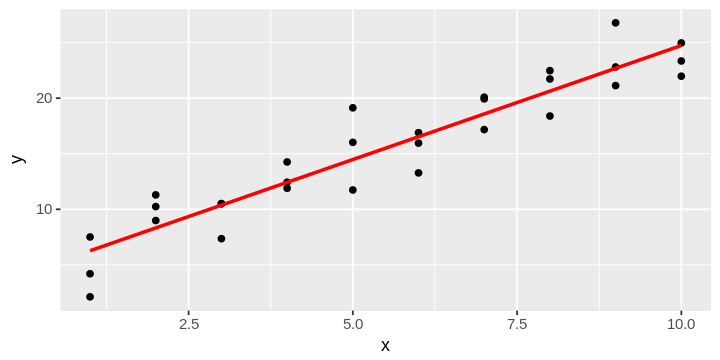

In [60]:
ggplot(sim1, aes(x)) +
  geom_point(aes(y = y)) +
  geom_line(aes(y = pred), data = grid, colour = "red", size = 1)

### Residuals
The predictions tells you the pattern that the model has captured, and the residuals tell you what the model has missed. The residuals are just the distances between the observed and predicted values that we computed above.

We add residuals to the data with add_residuals(), which works much like add_predictions(). Note, however, that we use the original dataset, not a manufactured grid. This is because to compute residuals we need actual y values

In [61]:
sim1 <- sim1 %>% 
  add_residuals(sim1_mod)
sim1

x,y,resid
1,4.199913,-2.072442018
1,7.510634,1.238279125
1,2.125473,-4.146882207
2,8.988857,0.664969362
2,10.243105,1.919217378
2,11.296823,2.972935148
3,7.356365,-3.019056466
3,10.505349,0.129928252
3,10.511601,0.136179642
4,12.434589,0.007634878


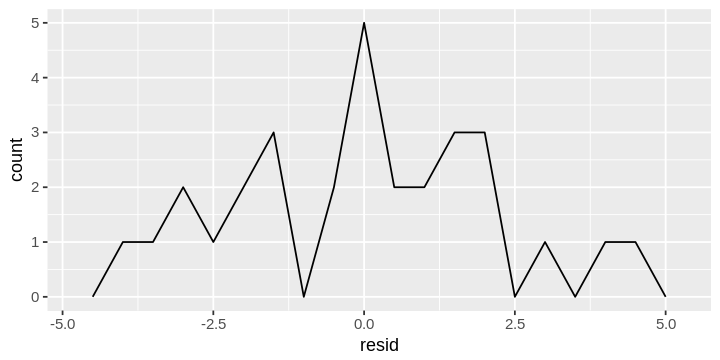

In [62]:
ggplot(sim1, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

Note that the average of the residual will always be 0. Now let's create what's called a residual plot with the predictor(s) in the x-axis:

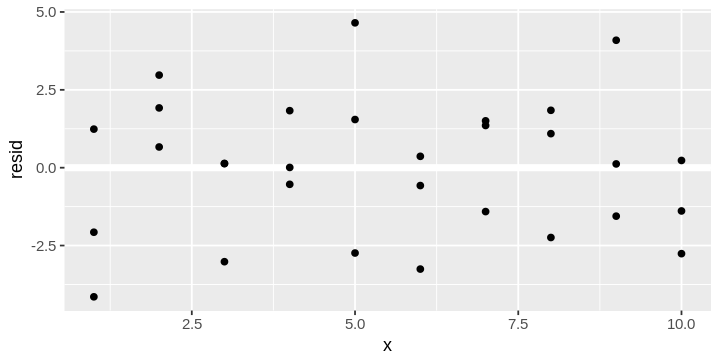

In [63]:
ggplot(sim1, aes(x, resid)) + 
  geom_ref_line(h = 0) +
  geom_point()

### Categorical Variables
When you have a categorical variable, R assigns each category a number. For instance, imagine you have a formula like y ~ sex, where sex could either be male or female. It doesn’t make sense to convert that to a formula like y = a_0 + a_1 * sex because sex isn’t a number. R converts it to y = x_0 + x_1 * sex_male where sex_male is one if sex is male and zero otherwise.

In [64]:
df <- tribble(
  ~ sex, ~ response,
  "female", 1,
  "female", 2,
  "male", 1
)
model_matrix(df, response ~ sex)

(Intercept),sexmale
1,0
1,0
1,1


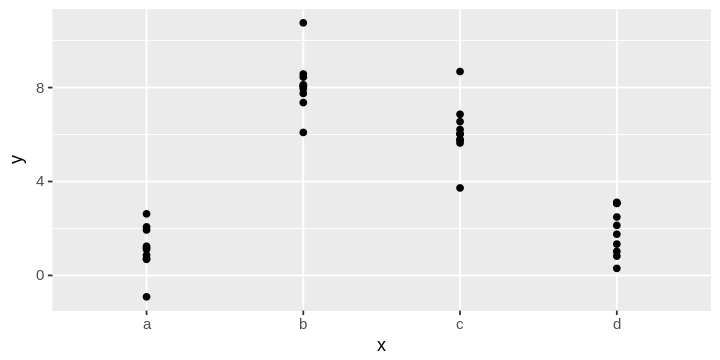

In [65]:
ggplot(sim2) + 
  geom_point(aes(x, y))

In [66]:
mod2 <- lm(y ~ x, data = sim2)

grid <- sim2 %>% 
  data_grid(x) %>% 
  add_predictions(mod2)
grid

x,pred
a,1.152166
b,8.116039
c,6.127191
d,1.910981


Effectively, a model with a categorical x will predict the mean value for each category. (Why? Because the mean minimises the root-mean-squared distance.) That’s easy to see if we overlay the predictions on top of the original data:

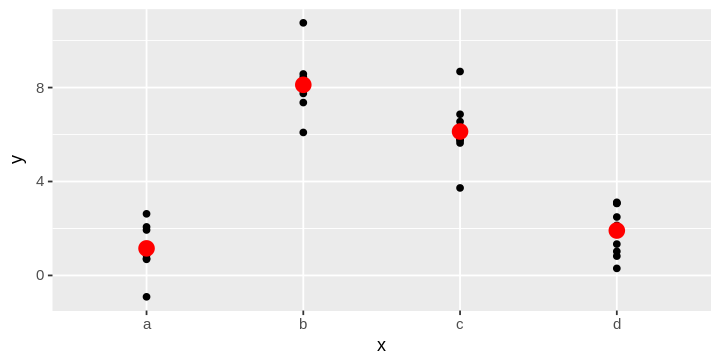

In [67]:
ggplot(sim2, aes(x)) + 
  geom_point(aes(y = y)) +
  geom_point(data = grid, aes(y = pred), colour = "red", size = 4)

### Interactions (Continuous and Categorical)
What happens when you combine a continuous and a categorical variable? sim3 contains a categorical predictor and a continuous predictor. We can visualise it with a simple plot:

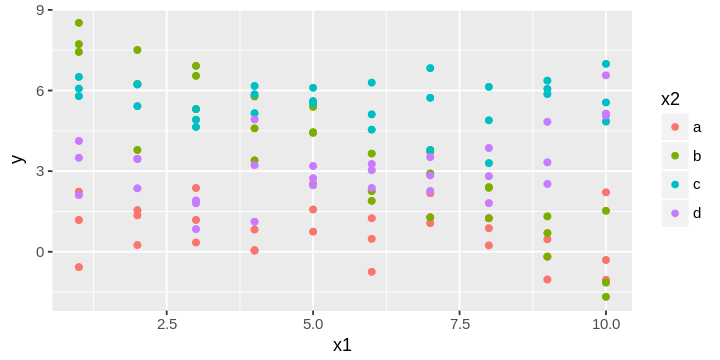

In [68]:
ggplot(sim3, aes(x1, y)) + 
  geom_point(aes(colour = x2))

There are two possible models you could fit to this data

In [69]:
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod2 <- lm(y ~ x1 * x2, data = sim3)
summary(mod1)
summary(mod2)


Call:
lm(formula = y ~ x1 + x2, data = sim3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4674 -0.8524 -0.0729  0.7886  4.3005 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87167    0.27099   6.907 4.60e-11 ***
x1          -0.19674    0.03407  -5.774 2.44e-08 ***
x2b          2.88781    0.27681  10.432  < 2e-16 ***
x2c          4.80574    0.27681  17.361  < 2e-16 ***
x2d          2.35959    0.27681   8.524 1.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.516 on 235 degrees of freedom
Multiple R-squared:  0.5911,	Adjusted R-squared:  0.5841 
F-statistic: 84.91 on 4 and 235 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x1 * x2, data = sim3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.87634 -0.67655  0.04837  0.69963  2.58607 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.30124    0.28070   4.636 5.94e-06 ***
x1          -0.09302    0.04524  -2.056   0.0409 *  
x2b          7.06938    0.39697  17.808  < 2e-16 ***
x2c          4.43090    0.39697  11.162  < 2e-16 ***
x2d          0.83455    0.39697   2.102   0.0366 *  
x1:x2b      -0.76029    0.06398 -11.884  < 2e-16 ***
x1:x2c       0.06815    0.06398   1.065   0.2879    
x1:x2d       0.27728    0.06398   4.334 2.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.007 on 232 degrees of freedom
Multiple R-squared:  0.8221,	Adjusted R-squared:  0.8167 
F-statistic: 153.1 on 7 and 232 DF,  p-value: < 2.2e-16


When you add variables with +, the model will estimate each effect independent of all the others. It’s possible to fit the so-called interaction by using model *. For example, y ~ x1 * x2 is translated to y = a_0 + a_1 * x1 + a_2 * x2 + a_12 * x1 * x2. Note that whenever you use *, both the interaction and the individual components are included in the model.

To visualise these models we need two new tricks:

We have two predictors, so we need to give data_grid() both variables. It finds all the unique values of x1 and x2 and then generates all combinations.

To generate predictions from both models simultaneously, we can use gather_predictions() which adds each prediction as a row. The complement of gather_predictions() is spread_predictions() which adds each prediction to a new column.

Together this gives us

In [70]:
grid <- sim3 %>% 
  data_grid(x1, x2) %>% 
  gather_predictions(mod1, mod2)
grid[1:10,]

model,x1,x2,pred
mod1,1,a,1.674928
mod1,1,b,4.562739
mod1,1,c,6.480664
mod1,1,d,4.034515
mod1,2,a,1.478190
mod1,2,b,4.366001
mod1,2,c,6.283926
mod1,2,d,3.837777
mod1,3,a,1.281453
mod1,3,b,4.169263


We can visualise the results for both models on one plot using facetting:

In [ ]:
ggplot(sim3, aes(x1, y, colour = x2)) + 
  geom_point() + 
  geom_line(data = grid, aes(y = pred)) + 
  facet_wrap(~ model)

Note that the model that uses + has the same slope for each line, but different intercepts. The model that uses * has a different slope and intercept for each line.

Which model is better for this data? We can take look at the residuals. Here I’ve facetted by both model and x2 because it makes it easier to see the pattern within each group.

In [ ]:
sim3 <- sim3 %>% 
  gather_residuals(mod1, mod2)

ggplot(sim3, aes(x1, resid, colour = x2)) + 
  geom_point() + 
  facet_grid(model ~ x2)

There is little obvious pattern in the residuals for mod2. The residuals for mod1 show that the model has clearly missed some pattern in b, and less so, but still present is pattern in c, and d. You might wonder if there’s a precise way to tell which of mod1 or mod2 is better. There is, but it requires a lot of mathematical background, and we don’t really care. Here, we’re interested in a qualitative assessment of whether or not the model has captured the pattern that we’re interested in.

### Interactions (two continuous)

Let's use sim4 which has two continuous predictors:

In [ ]:
mod1 <- lm(y ~ x1 + x2, data = sim4)
mod2 <- lm(y ~ x1 * x2, data = sim4)
summary(mod1)
summary(mod2)

In [ ]:
grid <- sim4 %>% 
  data_grid( # seq_range to use a regularly spaced grid of five values between the minimum and maximum numbers.
    x1 = seq_range(x1, 5), 
    x2 = seq_range(x2, 5) 
  ) %>% 
  gather_predictions(mod1, mod2)
grid[1:10,]

Next let’s try and visualise that model. We have two continuous predictors, so you can imagine the model like a 3d surface. We could display that using geom_tile():

In [ ]:
# Could use plot3D
ggplot(grid, aes(x1, x2)) + 
  geom_tile(aes(fill = pred)) + 
  facet_wrap(~ model)

That doesn’t suggest that the models are very different! But that’s partly an illusion: our eyes and brains are not very good at accurately comparing shades of colour. Instead of looking at the surface from the top, we could look at it from either side, showing multiple slices:

In [ ]:
ggplot(grid, aes(x1, pred, colour = x2, group = x2)) + 
  geom_line() +
  facet_wrap(~ model)
ggplot(grid, aes(x2, pred, colour = x1, group = x1)) + 
  geom_line() +
  facet_wrap(~ model)

This shows you that interaction between two continuous variables works basically the same way as for a categorical and continuous variable. An interaction says that there’s not a fixed offset: you need to consider both values of x1 and x2 simultaneously in order to predict y

### Transformation
You can also perform transformations inside the model formula. For example, log(y) ~ sqrt(x1) + x2 is transformed to log(y) = a_1 + a_2 * sqrt(x1) + a_3 * x2. If your transformation involves +, *, ^, or -, you’ll need to wrap it in I() so R doesn’t treat it like part of the model specification. For example, y ~ x + I(x ^ 2) is translated to y = a_1 + a_2 * x + a_3 * x^2. If you forget the I() and specify y ~ x ^ 2 + x, R will compute y ~ x * x + x. But x * x means the interaction of x with itself, which is the same as x. R automatically drops redundant variables so x + x become x, meaning that  y ~ x ^ 2 + x specifies the function y = a_1 + a_2 * x. That’s probably not what you intended!

Transformations are useful because you can use them to approximate non-linear functions. If you’ve taken a calculus class, you may have heard of Taylor’s theorem which says you can approximate any smooth function with an infinite sum of polynomials. That means you can use a polynomial function to get arbitrarily close to a smooth function by fitting an equation like y = a_1 + a_2 * x + a_3 * x^2 + a_4 * x ^ 3. Typing that sequence by hand is tedious, so R provides a helper function: poly().

However there’s one major problem with using poly(): outside the range of the data, polynomials rapidly shoot off to positive or negative infinity. One safer alternative is to use the natural spline, splines::ns().

In [ ]:
sim5 <- tibble(
  x = seq(0, 3.5 * pi, length = 50),
  y = 4 * sin(x) + rnorm(length(x))
)

ggplot(sim5, aes(x, y)) +
  geom_point()

In [ ]:
library(splines)
mod1 <- lm(y ~ ns(x, 1), data = sim5)
mod2 <- lm(y ~ ns(x, 2), data = sim5)
mod3 <- lm(y ~ ns(x, 3), data = sim5)
mod4 <- lm(y ~ ns(x, 4), data = sim5)
mod5 <- lm(y ~ ns(x, 5), data = sim5)

grid <- sim5 %>% 
  data_grid(x = seq_range(x, n = 50, expand = 0.1)) %>% 
  gather_predictions(mod1, mod2, mod3, mod4, mod5, .pred = "y")

ggplot(sim5, aes(x, y)) + 
  geom_point() +
  geom_line(data = grid, colour = "red") +
  facet_wrap(~ model)

Notice that the extrapolation outside the range of the data is clearly bad. This is the downside to approximating a function with a polynomial. But this is a very real problem with every model: the model can never tell you if the behaviour is true when you start extrapolating outside the range of the data that you have seen. You must rely on theory and science.